# Kai Ru
# 31764139

In [96]:
import pandas as pd
import numpy as np
data=pd.read_excel("S&P 100 constituents Aktienkurse-work.xlsx",encoding="SHIFT-JIS",header=3)
data=data.drop(labels=0)
data=data.reset_index(drop= True)
data.index=data["Name"]
data=data.drop(["Name"],axis=1)
data=data.dropna(axis=1)
symbols = data.columns
df = data[symbols]
df=df.astype("float")

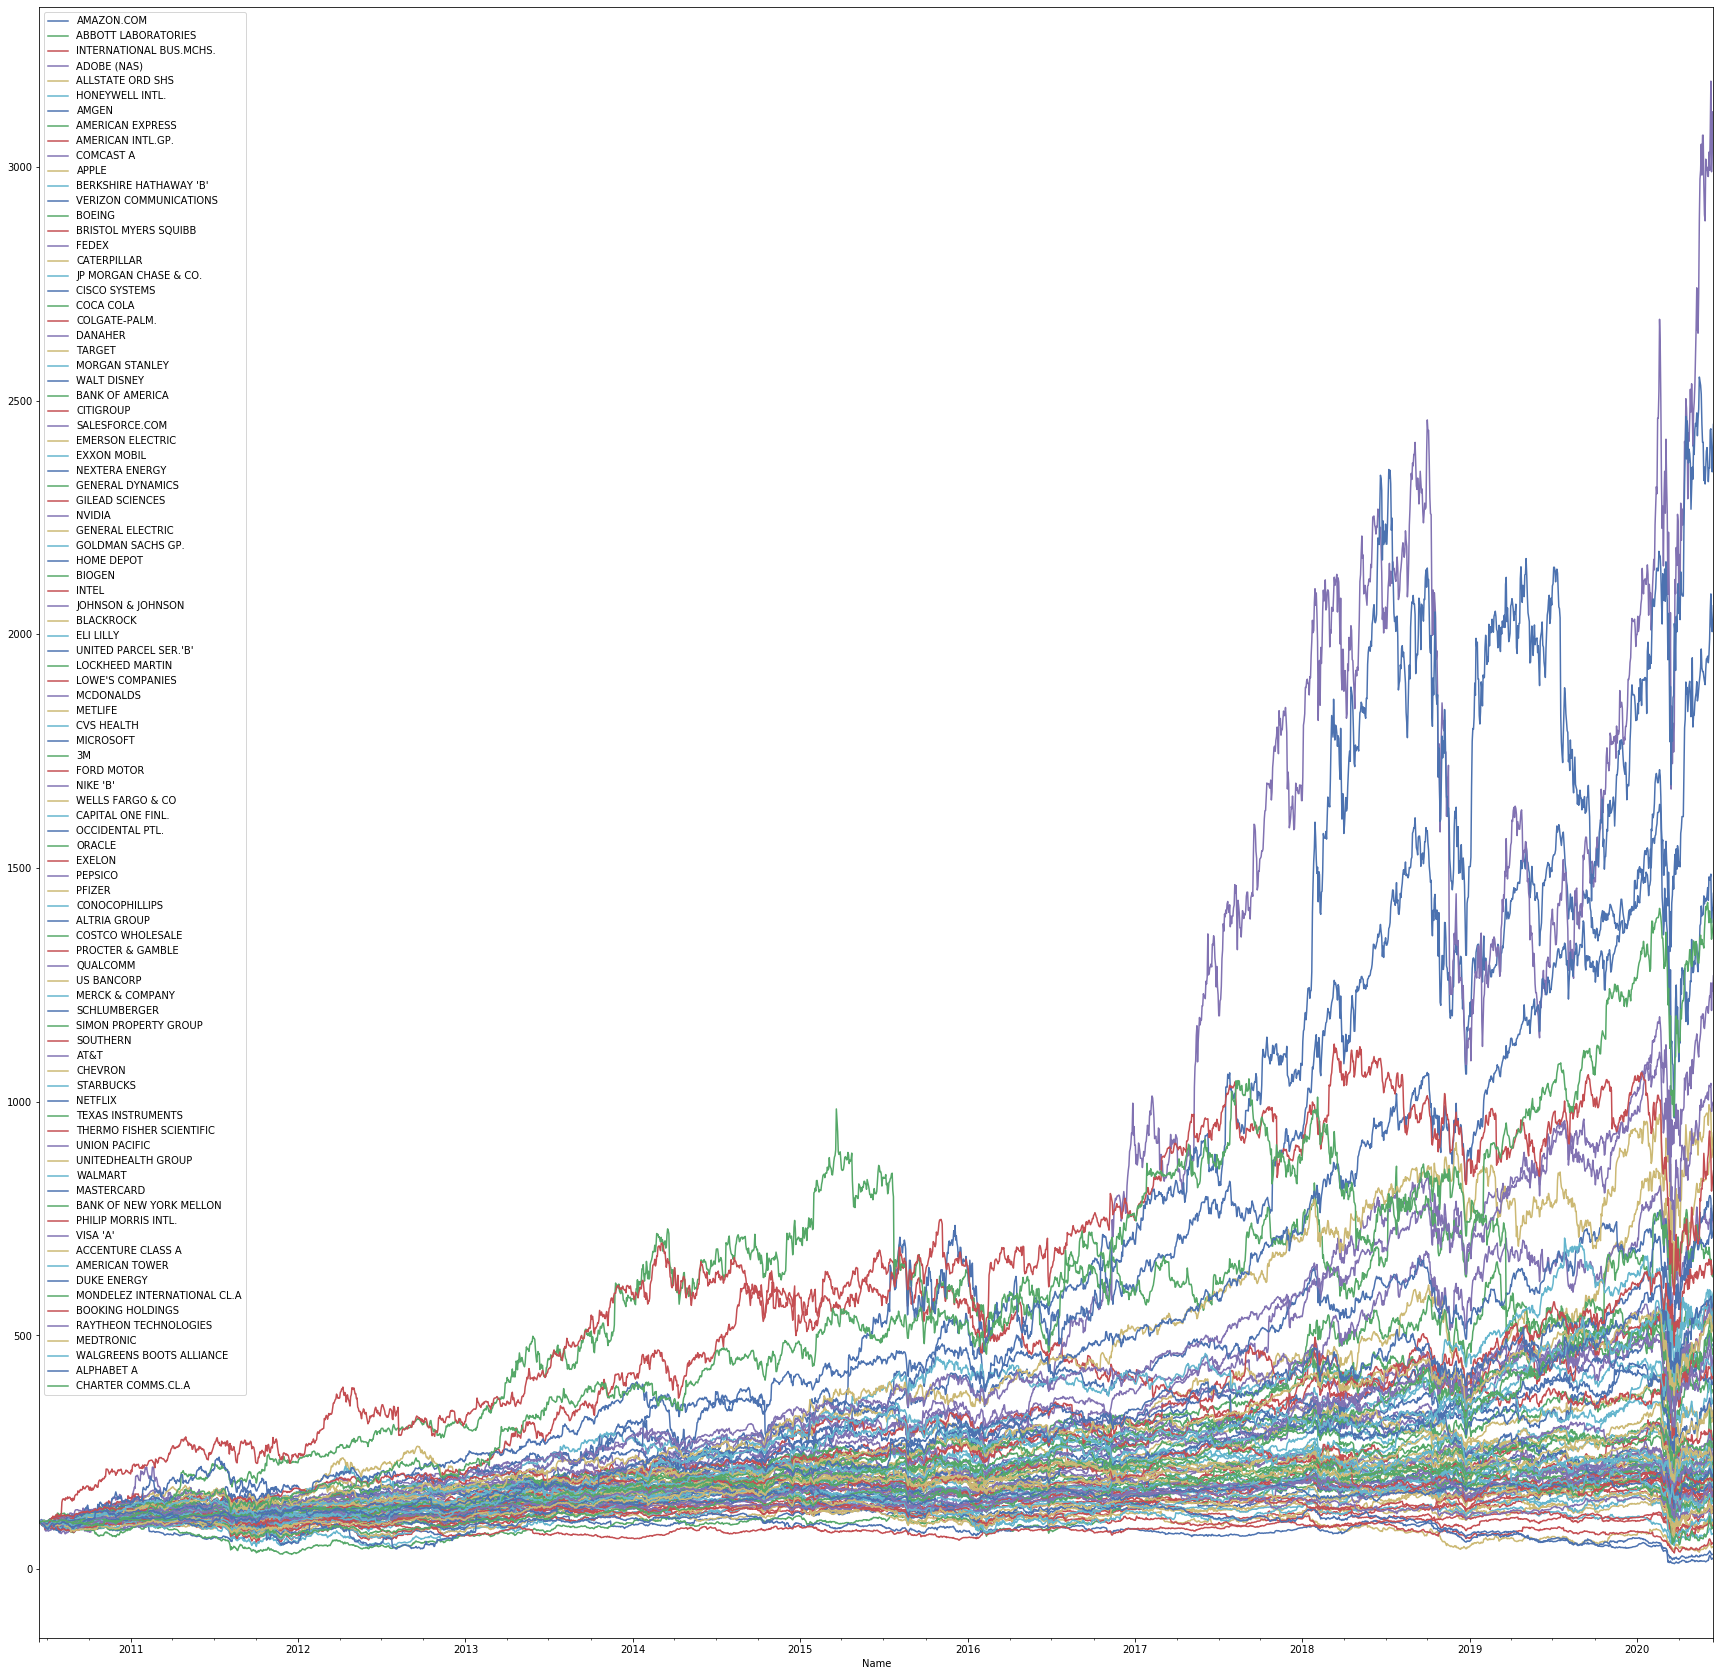

In [97]:
import matplotlib.pyplot as plt
%matplotlib inline
(df / df.iloc[0] * 100).plot(figsize=(30, 30))
plt.savefig('stat_01.png')

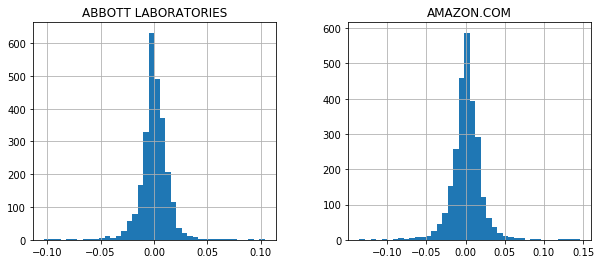

In [3]:
noa = len(symbols)
df = df[symbols]
rets = np.log(df / df.shift(1))
rets[symbols[:2]].hist(bins=40, figsize=(10, 4))
plt.savefig('stat_2.png')

In [4]:
import quandl
import datetime
quandl.ApiConfig.api_key = 'DxKMsvF36hXo5BAMpeDK'
Wk_Bank_Discount_Rate_52=quandl.get("USTREASURY/BILLRATES" ,
                          start_date=datetime.datetime(2010, 6, 16), 
                          end_date=datetime.datetime(2020, 6, 16))




In [5]:
3653/(52*7)

10.035714285714286

In [276]:
52*7*11-3653

351

In [279]:
yield_list=[]
for i in range(11):
    yield_list.append(Wk_Bank_Discount_Rate_52[datetime.datetime(2010, 6, 16)+datetime.timedelta(days=364*i):]\
                      ["52 Wk Bank Discount Rate"][0])

In [280]:
yield_list

[0.28, 0.18, 0.17, 0.13, 0.1, 0.26, 0.58, 1.14, 2.24, 1.99, 0.17]

In [281]:
risk_free10_11=(yield_list[10]/100)/(365/(365-351))

In [282]:
risk_free10_11

6.52054794520548e-05

In [283]:
risk_free=(1+yield_list[0]/100)*(1+yield_list[1]/100)*(1+yield_list[2]/100)*\
(1+yield_list[3]/100)*(1+yield_list[4]/100)*(1+yield_list[5]/100)*(1+yield_list[6]/100)*\
             (1+yield_list[7]/100)*(1+yield_list[8]/100)*(1+yield_list[9]/100)*(1+risk_free10_11/100)-1

In [284]:
risk_free

0.072685269311908

In [285]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

mu = expected_returns.mean_historical_return(data)
S = risk_models.sample_cov(data,frequency=252)


EF_min = EfficientFrontier(mu, S)

EF_min.min_volatility()

EF_min.portfolio_performance(verbose=True)

Expected annual return: 10.5%
Annual volatility: 12.9%
Sharpe Ratio: 0.66


(0.10454020479360981, 0.12867502727067331, 0.6570055323615821)

Expected annual return: 10.5%
Annual volatility: 12.9%
Sharpe Ratio: 0.66


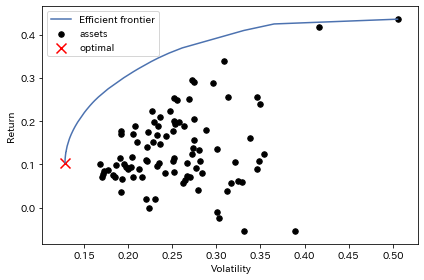

In [286]:


%matplotlib inline
cla = pypfopt.CLA(mu, S)
cla.weights=EF_min.weights
cla.portfolio_performance(verbose=True)
ax=plotting.plot_efficient_frontier(cla,showfig = True)

In [455]:

sum(EF_min.weights*mu)

0.10454020479360979

In [380]:
EF_min_weights=EF_min.clean_weights()
sorted(EF_min_weights.items(), key=lambda x:x[1],reverse=True)[:20]

[('VERIZON COMMUNICATIONS', 0.15551),
 ('WALMART', 0.12965),
 ('MCDONALDS', 0.10823),
 ('JOHNSON & JOHNSON', 0.10205),
 ('COCA COLA', 0.09447),
 ('PROCTER & GAMBLE', 0.0707),
 ('DUKE ENERGY', 0.05586),
 ('BRISTOL MYERS SQUIBB', 0.05568),
 ('ALTRIA GROUP', 0.05148),
 ('COSTCO WHOLESALE', 0.04357),
 ('SOUTHERN', 0.02808),
 ("UNITED PARCEL SER.'B'", 0.02455),
 ('TARGET', 0.01669),
 ('LOCKHEED MARTIN', 0.01385),
 ('CHARTER COMMS.CL.A', 0.01265),
 ('NETFLIX', 0.01045),
 ('AMAZON.COM', 0.00771),
 ('GILEAD SCIENCES', 0.00765),
 ('PFIZER', 0.00666),
 ('MERCK & COMPANY', 0.00453)]

In [403]:


EF = EfficientFrontier(mu, S)
weights = EF.max_sharpe(risk_free_rate=risk_free)

EF.portfolio_performance(verbose=True)

Expected annual return: 32.4%
Annual volatility: 21.4%
Sharpe Ratio: 1.42


(0.32414142368885623, 0.2140098791488858, 1.4211559994259249)

In [423]:
l=[]
for i in weights.values():
    l.append(i)

In [443]:
sum(np.array(l)*mu)

0.3241414236888562

Expected annual return: 32.4%
Annual volatility: 21.4%
Sharpe Ratio: 1.42


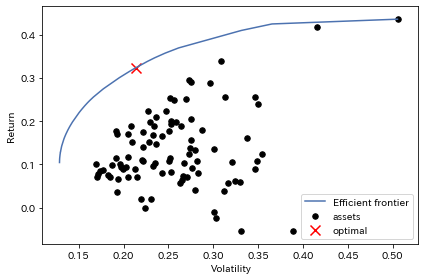

In [390]:

line=np.arange(0,0.3,0.01)

%matplotlib inline
cla = pypfopt.CLA(mu, S)
cla.weights=EF.weights
cla.portfolio_performance(verbose=True)
ax=plotting.plot_efficient_frontier(cla,showfig = True)

In [394]:
clean_weights=cla.clean_weights()
sorted(clean_weights.items(),key=lambda x:x[1],reverse=True)[:20]

[('CHARTER COMMS.CL.A', 0.26906),
 ('AMAZON.COM', 0.21062),
 ('NVIDIA', 0.14547),
 ('NETFLIX', 0.1162),
 ('UNITEDHEALTH GROUP', 0.0876),
 ('MASTERCARD', 0.08266),
 ('NEXTERA ENERGY', 0.06652),
 ('BIOGEN', 0.02188),
 ('ABBOTT LABORATORIES', 0.0),
 ('INTERNATIONAL BUS.MCHS.', 0.0),
 ('ADOBE (NAS)', 0.0),
 ('ALLSTATE ORD SHS', 0.0),
 ('HONEYWELL INTL.', 0.0),
 ('AMGEN', 0.0),
 ('AMERICAN EXPRESS', 0.0),
 ('AMERICAN INTL.GP.', 0.0),
 ('COMCAST A', 0.0),
 ('APPLE', 0.0),
 ("BERKSHIRE HATHAWAY 'B'", 0.0),
 ('VERIZON COMMUNICATIONS', 0.0)]

In [361]:
weights = np.random.random(noa)  
weights /= np.sum(weights)

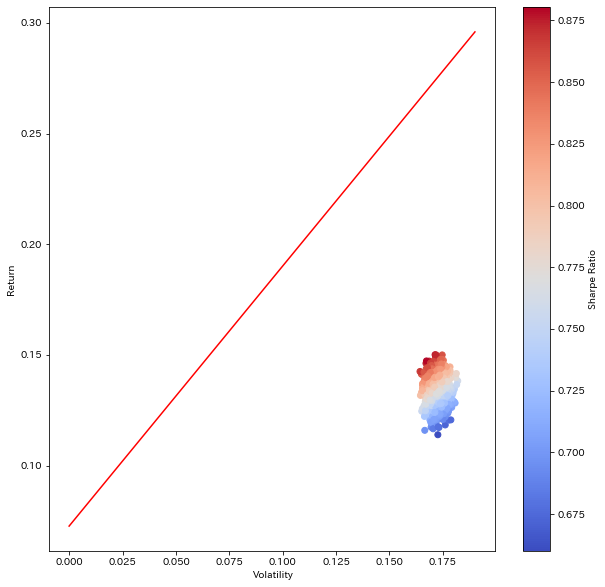

In [362]:
import matplotlib.pyplot as plt
import japanize_matplotlib
%matplotlib inline

noa = len(symbols)

rets = (df / df.shift(1))-1



weights = np.random.random(noa)  
weights /= np.sum(weights)


def port_ret(weights):
    return np.sum(rets.mean() * weights) * 252



def port_vol(weights):
    return np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))


prets = []
pvols = []
for p in range (2500):  
    weights = np.random.random(noa)  
    weights /= np.sum(weights)  
    prets.append(port_ret(weights))  
    pvols.append(port_vol(weights))  
prets = np.array(prets)
pvols = np.array(pvols)



line=np.arange(0,0.2,0.01)
y=((cla.portfolio_performance()[0]-risk_free)/cla.portfolio_performance()[1])*line+risk_free



plt.figure(figsize=(10, 10))
plt.scatter(pvols, prets, c=prets / pvols,
            marker='o', cmap='coolwarm')
plt.plot(line,y,'r', lw=1.5)
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.colorbar(label='Sharpe Ratio')